<a href="https://colab.research.google.com/github/IlyaZutler/Project_2-Trucks/blob/main/DM%20_%20Project_3_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic mitochondria Project - Heavy Machinery Auction Price Estimator

> https://www.kaggle.com/t/9baafb8850d74e4499c7b1ba97d6f115

### Timeline
- **Start Date:** [Start Date]
- **End Date:** 14/07/2024 (11 days to go)

## Getting Started

### 5. RandomForestRegressor Model

### 6. Model Improvement

### 7. Final Submission

## Practical Data Science Guidelines

## Collaboration and Presentation

- **Collaboration:** Discuss your work openly within your team or with other teams. Sharing insights and learning from each other is encouraged.
- **Presentation:** Present your methodology, results, and the techniques that helped the most. Document your journey and the steps you took to achieve your results



In [1]:
import gdown
from pathlib import Path

import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.pipeline import Pipeline

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

!pip -qq install category_encoders
from category_encoders import TargetEncoder

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 885.6 kB/s eta 0:00:00


In [ ]:
def download_from_gdrive(url, filename):
    # Extract the file ID from the URL
    file_id = url.split('/')[-2]
    download_url = f"https://drive.google.com/uc?id={file_id}"

    # Download the file
    if Path(filename).exists():
        print(f"File '{filename}' already exists. Skipping download.")
    else:
        gdown.download(download_url, filename, quiet=False)
        print(f"File downloaded as: {filename}")

train = 'https://drive.google.com/file/d/1guqSpDv1Q7ZZjSbXMYGbrTvGns0VCyU5/view?usp=drive_link'
valid = 'https://drive.google.com/file/d/1j7x8xhMimKbvW62D-XeDfuRyj9ia636q/view?usp=drive_link'
# Example usage

download_from_gdrive(train, 'train.csv')
download_from_gdrive(valid, 'valid.csv')

df = pd.read_csv('train.csv')
df_valid = pd.read_csv('valid.csv')


File 'train.csv' already exists. Skipping download.
File 'valid.csv' already exists. Skipping download.


<ipython-input-51-861d4f7287ed>:20: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


## Exploratory Data Analysis (EDA)

In [ ]:
#df.fiProductClassDesc.value_counts()

In [ ]:
#df.info()

In [ ]:
# df.isnull().sum()

In [ ]:
#df.describe()

In [ ]:
#sns.histplot(data=df, x='SalePrice', bins=20)

In [ ]:
## to see value_counts for all categorical columns, but some realy categorical columns has numerical type like ModelID
# categorical_cols = df.select_dtypes(exclude='number').columns
# for col in categorical_cols:
#   print(f"Value counts for column '{col}' in TRAIN DF :")
#   print(df[col].value_counts())
#   print(f"NaN values in Train: {df[col].isnull().sum()} ")
#   print()
#   print(f"Value counts for column '{col}' in VALID :")
#   print(df_valid[col].value_counts())
#   print()
#   print(f"NaN values in Valid :{df_valid[col].isnull().sum()} ")
#   print()
#   print()

### 3. Data Preprocessing

In [ ]:
def Num_to_Object(X, col):
    for col_ in col:
        X[col] = X[col].astype('object')
    return X

df = Num_to_Object(df, col = ['datasource'])
df_valid = Num_to_Object(df_valid, col = ['datasource'])

In [ ]:
def fix_mistakes(X, replacement_dict):
    for col, replacements in replacement_dict.items():
        X[col] = X[col].replace(replacements)
    return X

fix_mistakes(df, replacement_dict = {'Transmission': {'AutoShift': 'Autoshift'}})
fix_mistakes(df_valid, replacement_dict = {'Transmission': {'AutoShift': 'Autoshift'}})

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1222837,902859,1376,121,3,1000,0.0,NaN,1/5/2012 0:00,375L,375,NaN,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 66.0 to 90.0 Metr...",Kentucky,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
1,1222839,1048320,36526,121,3,2006,4412.0,Medium,1/5/2012 0:00,TX300LC2,TX300,LC,2,NaN,Large / Medium,"Hydraulic Excavator, Track - 28.0 to 33.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,Hydraulic,NaN,NaN,NaN,Steel,None or Unspecified,"12' 4""",None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN
2,1222841,999308,4587,121,3,2000,10127.0,Medium,1/5/2012 0:00,270LC,270,NaN,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 24.0 to 28.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"12' 4""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1222843,1062425,1954,121,3,1000,4682.0,Low,1/5/2012 0:00,892DLC,892,D,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 28.0 to 33.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
4,1222845,1032841,4701,121,3,2002,8150.0,Medium,1/4/2012 0:00,544H,544,H,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,6333344,1919201,21435,149,2,2005,NaN,NaN,3/7/2012 0:00,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Texas,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
11569,6333345,1882122,21436,149,2,2005,NaN,NaN,1/28/2012 0:00,30NX2,30,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
11570,6333347,1944213,21435,149,2,2005,NaN,NaN,1/28/2012 0:00,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Rubber,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
11571,6333348,1794518,21435

In [ ]:
def fix_data(X, date_col):
    for col in date_col:
        X[col] = pd.to_datetime(X[col])
        X[col + '_Year'] = X[col].dt.year
        X[col + '_Month'] = X[col].dt.month
        X = X.drop(col, axis=1)
    return X

df = fix_data(df, date_col = ['saledate'])
df_valid = fix_data(df_valid, date_col = ['saledate'])

In [ ]:
df.MachineHoursCurrentMeter.replace(0, np.nan, inplace=True)
df_valid.MachineHoursCurrentMeter.replace(0, np.nan, inplace=True)

#df[df['YearMade'] == 1000].head(20) # i have not idias what to do with year 1000
df.loc[df['YearMade'] == 1000, 'YearMade'] = df['saledate_Year'] - 1000
df_valid.loc[df_valid['YearMade'] == 1000, 'YearMade'] = df_valid['saledate_Year'] - 1000

df['age_car'] = df['saledate_Year'] - df['YearMade']
df_valid['age_car'] = df_valid['saledate_Year'] - df_valid['YearMade']

df_valid['saledate_Year'] = df_valid['saledate_Year'] - 1

In [ ]:
def first_word_name(X, col):
    for col_ in col:
        X[col_+'_first_word'] = X[col_].apply(lambda x: x.split()[0] if isinstance(x, str) else x)
    return X

first_word_name(df, col = ['fiProductClassDesc'])
first_word_name(df_valid, col = ['fiProductClassDesc'])

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saledate_Year,saledate_Month,age_car,fiProductClassDesc_first_word
0,1222837,902859,1376,121,3,1012,NaN,NaN,375L,375,NaN,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 66.0 to 90.0 Metr...",Kentucky,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,1,1000,Hydraulic
1,1222839,1048320,36526,121,3,2006,4412.0,Medium,TX300LC2,TX300,LC,2,NaN,Large / Medium,"Hydraulic Excavator, Track - 28.0 to 33.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,Hydraulic,NaN,NaN,NaN,Steel,None or Unspecified,"12' 4""",None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN,2011,1,6,Hydraulic
2,1222841,999308,4587,121,3,2000,10127.0,Medium,270LC,270,NaN,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 24.0 to 28.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"12' 4""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,1,12,Hydraulic
3,1222843,1062425,1954,121,3,1012,4682.0,Low,892DLC,892,D,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 28.0 to 33.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,1,1000,Hydraulic
4,1222845,1032841,4701,121,3,2002,8150.0,Medium,544H,544,H,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2011,1,10,Wheel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,6333344,1919201,21435,149,2,2005,NaN,NaN,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Texas,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,3,7,Hydraulic
11569,6333345,1882122,21436,149,2,2005,NaN,NaN,30NX2,30,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,1,7,Hydraulic
11570,6333347,1944213,21435,149,2,2005,NaN,NaN,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Rubber,None or Unspecified,None or Unspecified,N

In [ ]:
def ord_encod_nan(X, col, categories):
    encoder = OrdinalEncoder(categories=[categories], handle_unknown='use_encoded_value', unknown_value= -1)
    X[col + '_3'] = encoder.fit_transform(X[[col]])
    X[col + '_3'].replace(-1, np.nan, inplace=True)
    X[col + '_3'] = pd.to_numeric(X[col + '_3'], errors='coerce')
    X[col + '_3'] = X[col + '_3'].astype('float')

    return X

df = ord_encod_nan(df, col = 'UsageBand', categories = ['Low', 'Medium', 'High'])
df_valid = ord_encod_nan(df_valid, col = 'UsageBand', categories = ['Low', 'Medium', 'High'])

df = ord_encod_nan(df, col = 'ProductSize', categories = ['Mini', 'Compact', 'Small', 'Medium', 'Large / Medium', 'Large', 'High'])
df_valid = ord_encod_nan(df_valid, col = 'ProductSize', categories = ['Mini', 'Compact', 'Small', 'Medium', 'Large / Medium', 'Large', 'High'])

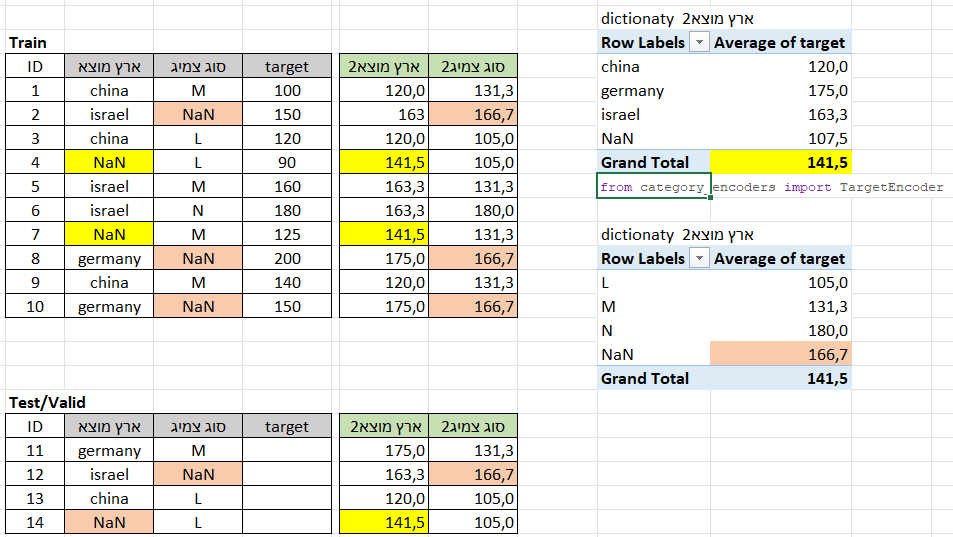

In [ ]:
def replace_dict(X, col, repl_dict):
    new_name = col + '_3'

    X[new_name] = X[col]
    for old, new in repl_dict.items():
        X[new_name] = X[new_name].str.replace(old, new, regex=False)
    X[new_name].replace('None or Unspecified', -1)
    X[new_name].replace(-1, np.nan, inplace=True)
    X[new_name] = pd.to_numeric(X[new_name], errors='coerce')
    X[new_name] = X[new_name].astype('float')

    return X

df = replace_dict(df, col = 'Undercarriage_Pad_Width', repl_dict= {' inch': ''})
df_valid = replace_dict(df_valid, col= 'Undercarriage_Pad_Width', repl_dict = {' inch': ''})

df = replace_dict(df, col = 'Stick_Length', repl_dict= {"' ": '.', '"': ''})
df_valid = replace_dict(df_valid, col= 'Stick_Length', repl_dict = {"' ": '.', '"': ''})

# Datas for model

In [ ]:
df2 = df.sample(401125, random_state=57) #401125

y = df2[['SalePrice']]
X = df2.drop(columns= ['SalePrice', 'SalesID', 'MachineID', 'ModelID', 'datasource'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)

col_train_num = X_train.select_dtypes('number').columns
col_test_num = X_test.select_dtypes('number').columns

X_train[col_train_num] = X_train[col_train_num].fillna(X_train[col_train_num].mean())
X_test[col_test_num] = X_test[col_test_num].fillna(X_train[col_train_num].mean())

obj_col = X_train.select_dtypes(exclude='number').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('mean_target_encode', TargetEncoder(
                                             min_samples_leaf=3,
                                             #smoothing=10,
                                             handle_missing='value',
                                             handle_unknown='value'
        ), obj_col),
     ],
    remainder='passthrough'
)

pipeline = Pipeline([
                    ('preprocessor', preprocessor
                     ),

                    ('model', RandomForestRegressor(n_jobs=-1,
                              n_estimators = 300,
                              #max_depth = 12,
                              min_impurity_decrease = 0.1,
                              #min_samples_split = 3,
                              max_features = 9,
                              random_state = 142
                              ))
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


print(f'Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(f'Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print(f'R²:' , r2_score(y_test, y_test_pred))
print(f'Train MAE:', mean_absolute_error(y_train, y_train_pred))
print(f'Test MAE:', mean_absolute_error(y_test, y_test_pred))


In [ ]:
# y_train = df[['SalePrice']]
# X_train = df.drop(columns= ['SalePrice', 'SalesID', 'MachineID', 'ModelID', 'datasource'])

# X_test = df_valid

# col_train_num = X_train.select_dtypes('number').columns
# col_test_num = X_test.select_dtypes('number').columns

# X_train[col_train_num] = X_train[col_train_num].fillna(X_train[col_train_num].mean())
# X_test[col_test_num] = X_test[col_test_num].fillna(X_train[col_train_num].mean())

# obj_col = X_train.select_dtypes(exclude='number').columns

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('mean_target_encode', TargetEncoder(
#                                              min_samples_leaf=3,
#                                              #smoothing=10,
#                                              handle_missing='value',
#                                              handle_unknown='value'
#         ), obj_col),  # Применение TargetEncoder к столбцу 'category'
#      ],
#     remainder='passthrough'  # Оставляет остальные столбцы без изменений
# )

# pipeline = Pipeline([
#                     ('preprocessor', preprocessor
#                      ),

#                     ('model', RandomForestRegressor(n_jobs=-1,
#                               n_estimators = 300,
#                               #max_depth = 12,
#                               min_impurity_decrease = 0.1,
#                               #min_samples_split = 3,
#                               max_features = 9,
#                               random_state = 142
#                               ))
# ])

# pipeline.fit(X_train, y_train)

# y_train_pred = pipeline.predict(X_train)
# y_valid_pred = pipeline.predict(df_valid)


# print(f'Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
# print(f'Train MAE:', mean_absolute_error(y_train, y_train_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Train RMSE: 2527.109391686671
Train MAE: 1595.946992102344


In [ ]:
# regressor = pipeline.named_steps['model']
# feature_importances = regressor.feature_importances_
# feature_names = regressor.feature_names_in_

# #
# feature_importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': feature_importances
# }).sort_values(by='Importance', ascending=False)

# print(feature_importance_df)

In [ ]:
# y_valid_pred = y_valid_pred *1.035

# # Create a submission file
# submission = pd.DataFrame({'SalesID': df_valid['SalesID'], 'SalePrice': y_valid_pred})
# submission.to_csv('final_submission.csv', index=False)